##### Silhouette extraction with binary threshold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

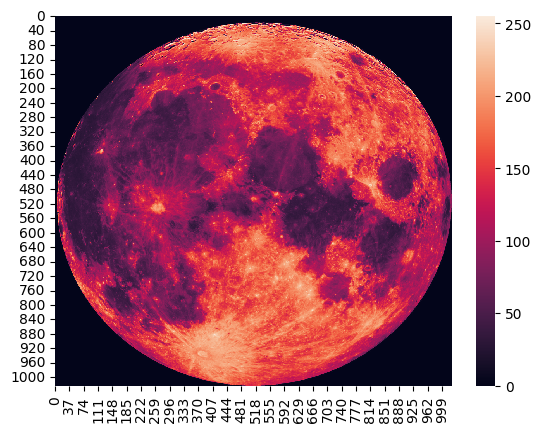

In [2]:
# load image
IMAGE_PATH = '/workspace/home/azuma/Personal_Projects/github/Moon_Pattern_Inference/images/raw_image.jpg'

image = Image.open(IMAGE_PATH).convert("L")
image = image.resize((1024, 1024), Image.LANCZOS) # resize
image = np.array(image)
# plot dark scale image
sns.heatmap(image)
plt.show()

***
Silhouette definition
- remove background
- detect maria (black) area

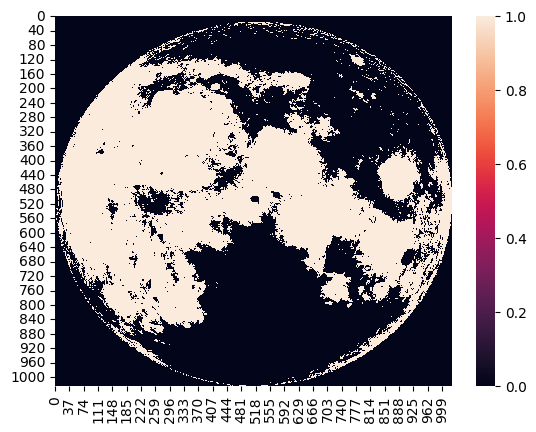

In [8]:
background_threshold = 5
threshold = 120
image = np.where(image<background_threshold,252,image) # remove background
binary_image = np.where(image<threshold,1,0)

# plot binary image
sns.heatmap(binary_image)
plt.show()

***
Eliminate the contour of the moon.

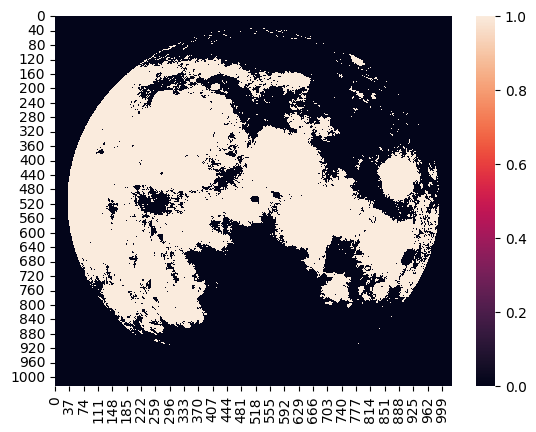

In [9]:
r = 480
i0, j0 = 512, 512

ii, jj = np.meshgrid(np.arange(1024), np.arange(1024), indexing='ij')
d = np.square(ii - i0) + np.square(jj - j0)
silhouette = np.where(d < r*r, binary_image, 0)

sns.heatmap(silhouette)
plt.show()


***
微妙に月の画像が横に楕円で、上部の輪郭が排除しきれていないが、ひとまずはこれをlunar maria maskとして運用していけば良いのでは？

In [6]:
pd.to_pickle(silhouette,'/workspace/home/azuma/Personal_Projects/github/Moon_Pattern_Inference/images/silhouette_mask_1024x1024.pkl')